In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import networkx as nx


# Load Niklas data.
data_folder = "/home/cedric/PHD/Dev/VolcapySIAM/data/InversionDatas/stromboli_173018/"

data_coords = np.load(os.path.join(data_folder,"niklas_data_coords_corrected_final.npy"))
data_coords_inds_insurf = np.load(os.path.join(data_folder,"niklas_data_inds_insurf.npy"))[1:] # Remove base station.
surface_data_coords = np.load(os.path.join(data_folder,"surface_data_coords.npy"))

# Get the nodes coordinates. Remember the nodes store their corresponding data
# index in the 'ind' attribute.
xyz = surface_data_coords
mean = np.mean(xyz, axis=0)
std = np.std(xyz, axis=0)
xyz_norm = (xyz - mean) / std

# Scale the z coordinate.
xyz_norm[:, 2] = 0.5 * xyz_norm[:, 2]

In [17]:
# Load graphs.
graph_surface = nx.read_edgelist(os.path.join(data_folder, "stromboli_surface.edgelist"))
graph_trails = nx.read_edgelist(os.path.join(data_folder, "stromboli_trails.edgelist"))

# The nodes are currently labeled by strings. Set them to
# integers, so can be used to index datapoints.
graph_surface = nx.relabel_nodes(graph_surface, lambda x: int(x))
graph_trails = nx.relabel_nodes(graph_trails, lambda x: int(x))

# Note that the nodes in the trail graph are labelled by their position in the field campaing data 'data_coords'. 
# To match them with the nodes in the discretisation in the surface, we have to relabel them.
graph_trails_insurf = nx.relabel_nodes(graph_trails, lambda i: data_coords_inds_insurf[i])

graph_merged = nx.compose(graph_surface, graph_trails_insurf)

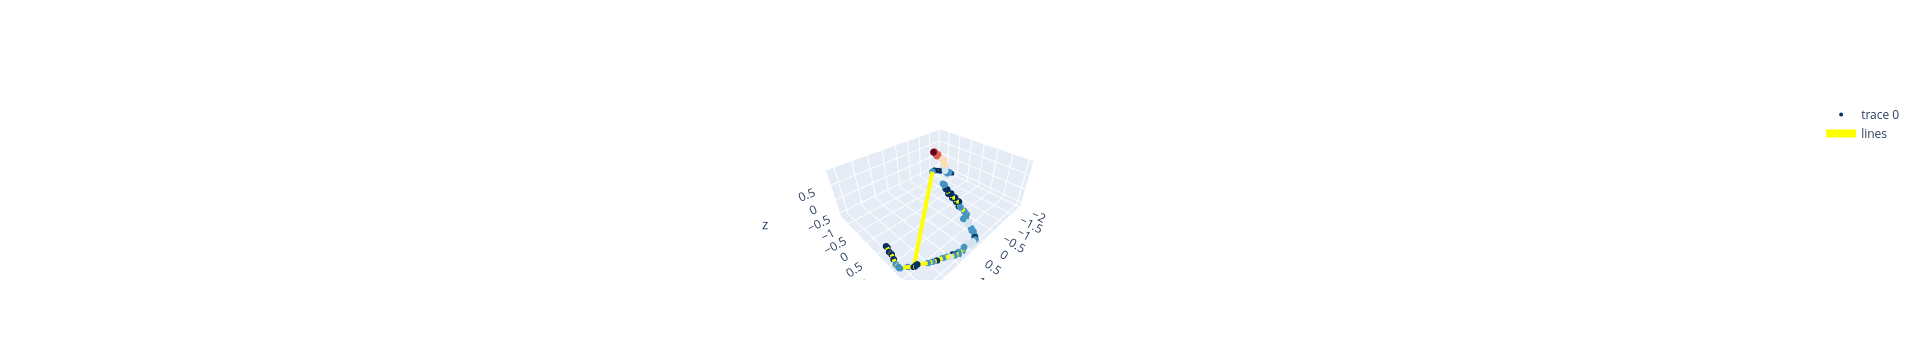

In [18]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import numpy as np

plt.rcParams["figure.figsize"] = (60,60)


x, y, z = xyz_norm[:, 0], xyz_norm[:, 1], xyz_norm[:, 2]

trace1 = go.Scatter3d(
    x=x[data_coords_inds_insurf[graph_trails.nodes]], y=y[data_coords_inds_insurf[graph_trails.nodes]], z=z[data_coords_inds_insurf[graph_trails.nodes]],
    mode='markers',
    marker=dict(
        size=4,
        color=z[graph_trails.nodes],
        colorscale='RdBu_r',
    ))
traces_list = [trace1]

x_lines, y_lines, z_lines = [], [], []
for edge in list(graph_trails.edges):
    for i in range(2):
        x_lines.append(xyz_norm[data_coords_inds_insurf[edge[i]], 0])
        y_lines.append(xyz_norm[data_coords_inds_insurf[edge[i]], 1])
        z_lines.append(xyz_norm[data_coords_inds_insurf[edge[i]], 2])
    x_lines.append(None)
    y_lines.append(None)
    z_lines.append(None)
    
trace2 = go.Scatter3d(
    x=x_lines,
    y=y_lines,
    z=z_lines,
    mode='lines',
    name='lines',
    line=dict(
        color='yellow',
        width=8
    )
)

fig = go.Figure(data=[trace1, trace2])
fig.show()

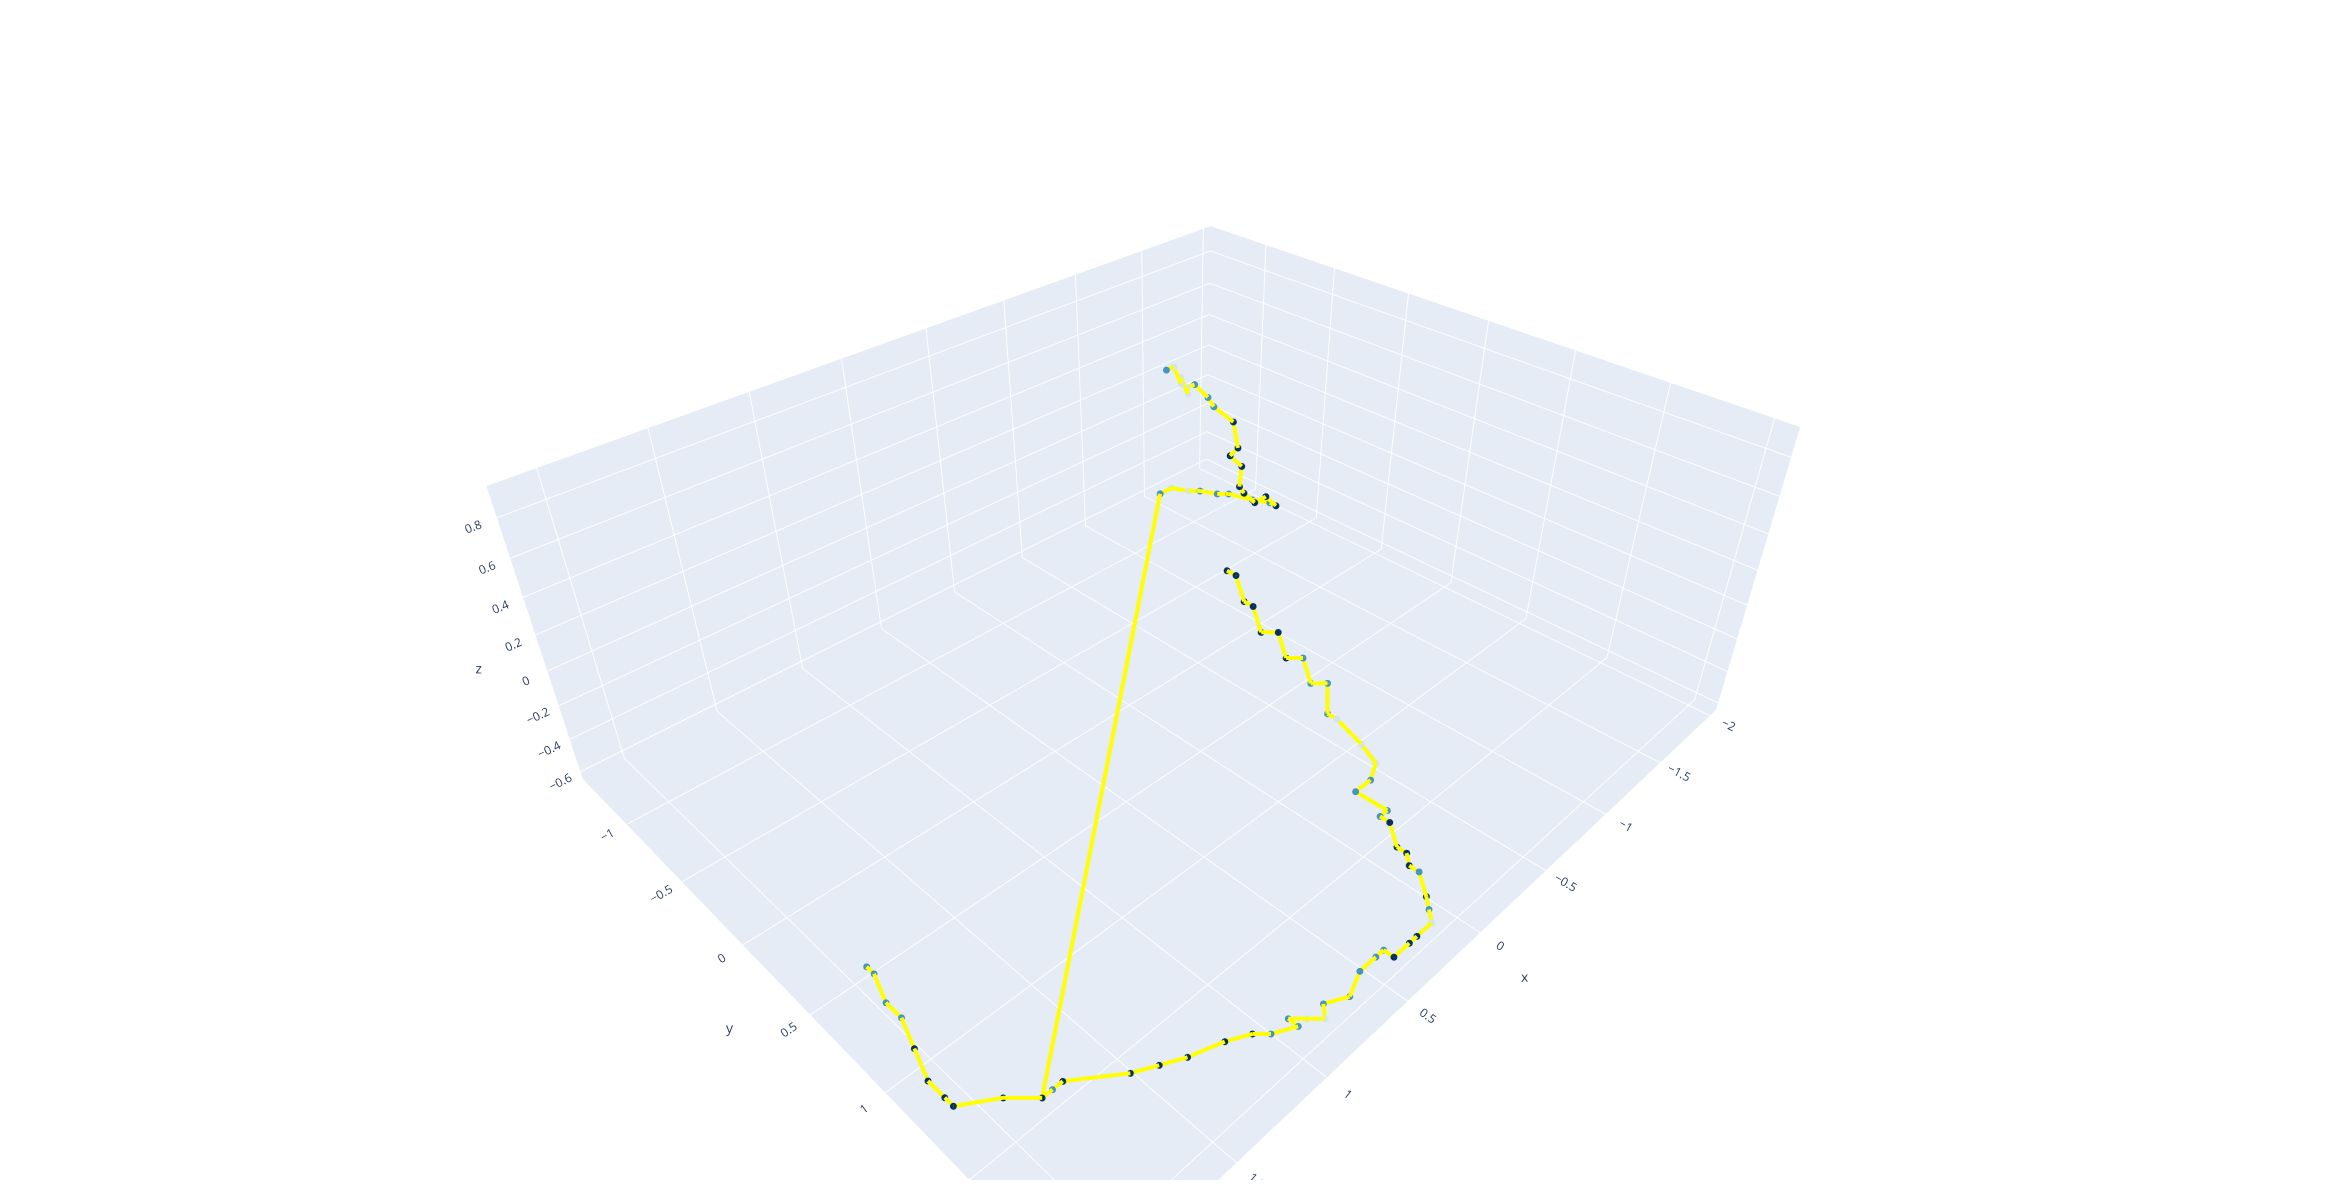

In [17]:
# Check if the relabelling went Ok.
trace1 = go.Scatter3d(
    x=x[graph_trails_insurf.nodes], y=y[graph_trails_insurf.nodes], z=z[graph_trails_insurf.nodes],
    mode='markers',
    marker=dict(
        size=4,
        color=z[graph_trails.nodes],
        colorscale='RdBu_r',
    ))
traces_list = [trace1]

x_lines, y_lines, z_lines = [], [], []
for edge in list(graph_trails_insurf.edges):
    for i in range(2):
        x_lines.append(xyz_norm[edge[i], 0])
        y_lines.append(xyz_norm[edge[i], 1])
        z_lines.append(xyz_norm[edge[i], 2])
    x_lines.append(None)
    y_lines.append(None)
    z_lines.append(None)
    
trace2 = go.Scatter3d(
    x=x_lines,
    y=y_lines,
    z=z_lines,
    mode='lines',
    name='lines',
    line=dict(
        color='yellow',
        width=8
    )
)

fig = go.Figure(data=[trace1, trace2])
fig.update_layout(
    showlegend=False,
    autosize=False,
    width=1800,
    height=1200,
    margin=dict(
        l=50,
        r=50,
        b=20,
        t=40,
        pad=2
    ),
)
fig.show()

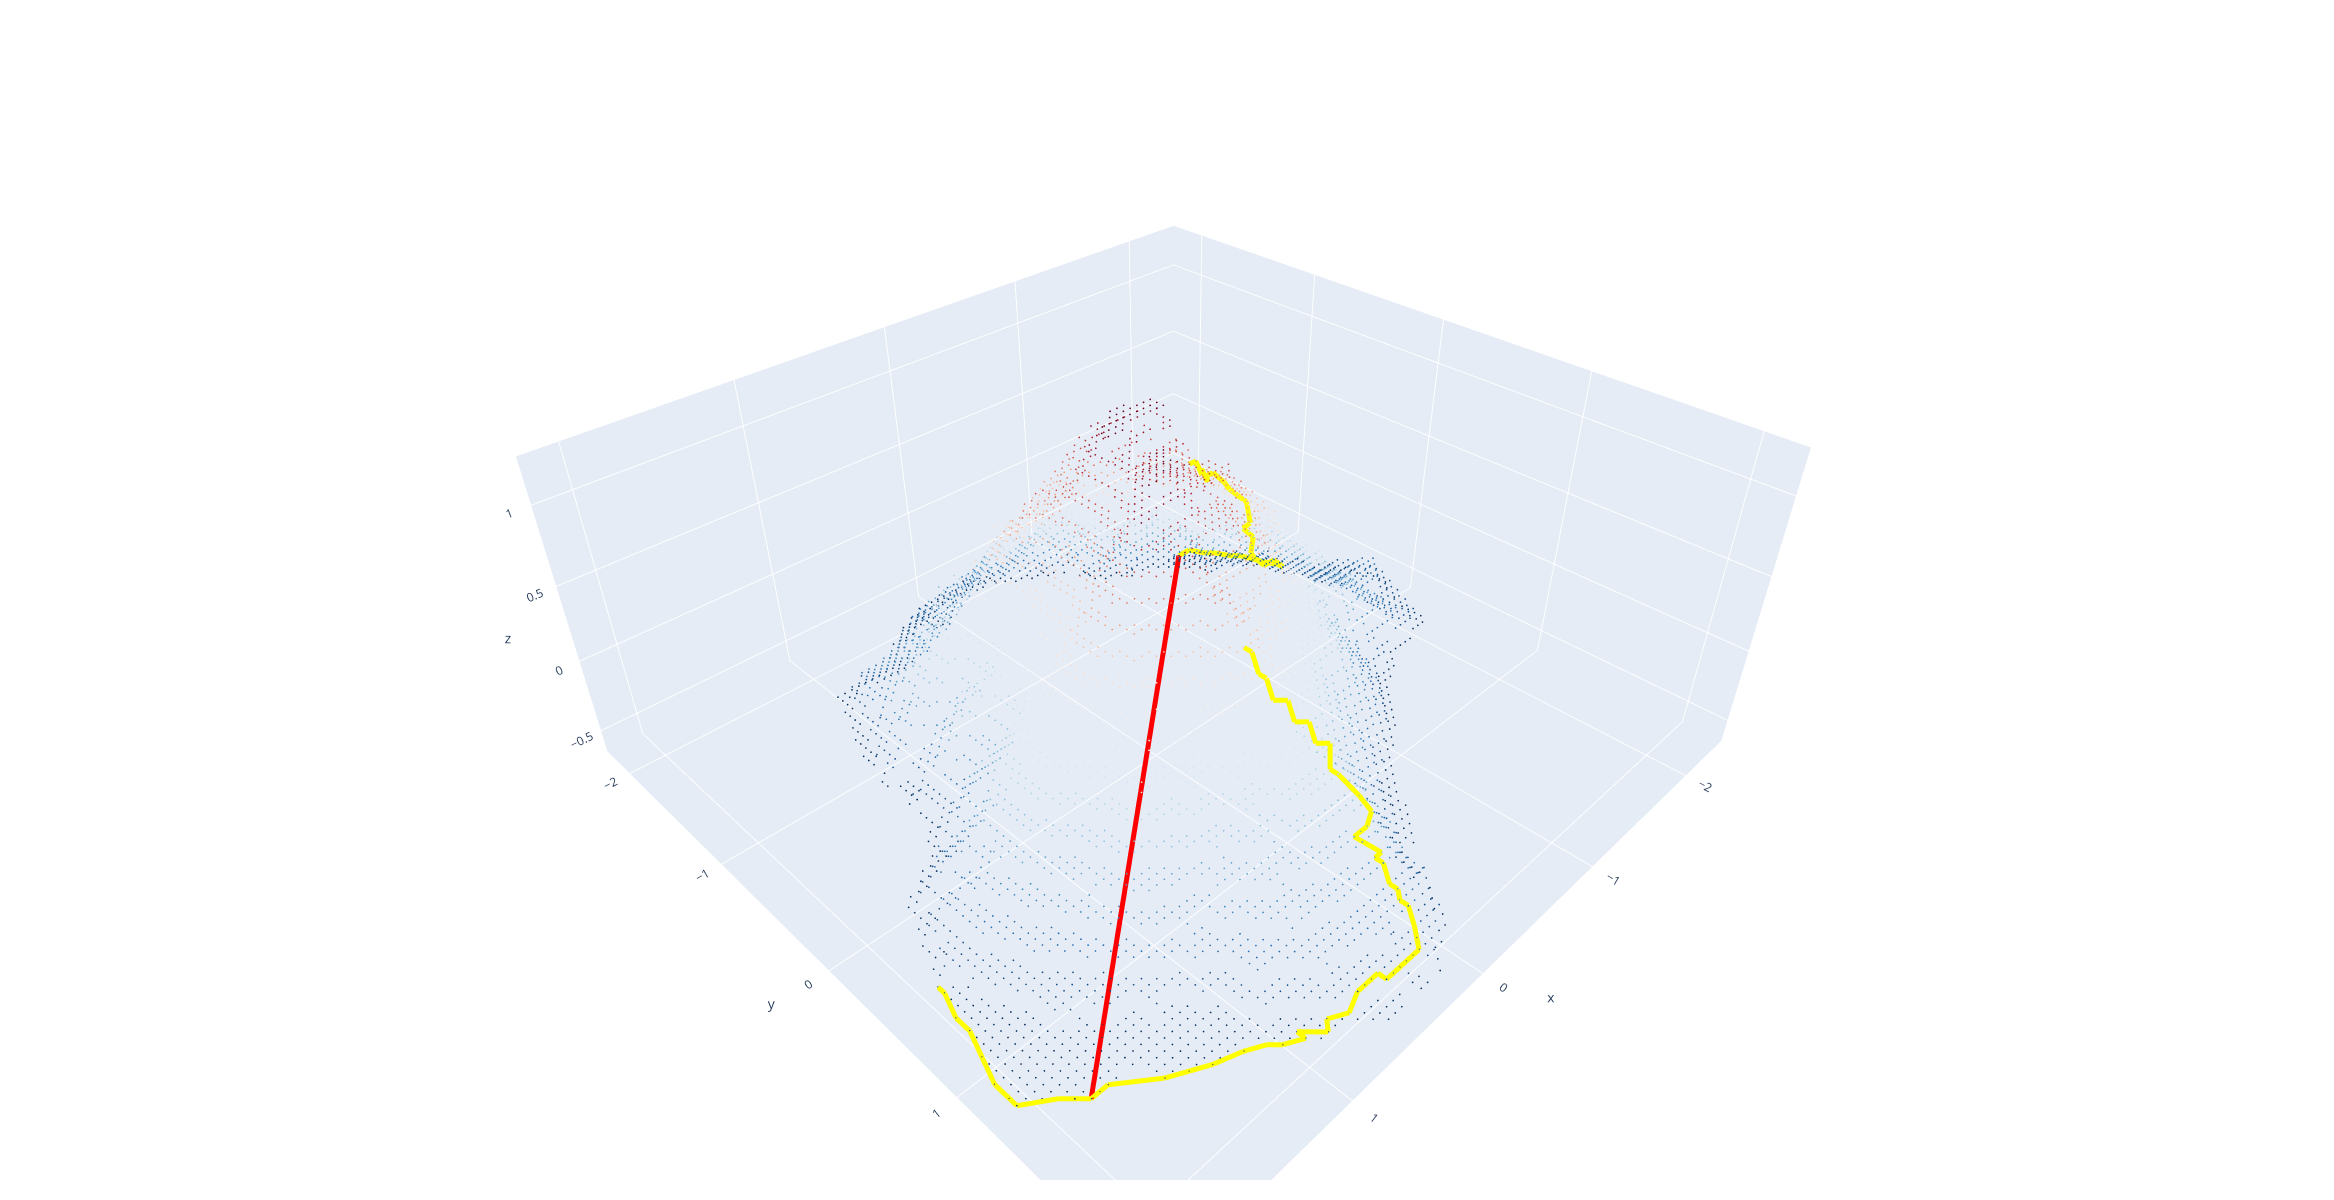

In [18]:
# Plot the whole surface, with the trails in color.

# Built color array for the edges.
edge_colors = []
for node1, node2, edge_attr in list(graph_trails_insurf.edges(data=True)):
    attr = edge_attr['path_attribute']
    if attr == 'no_trail':
        edge_colors.append('green')
        edge_colors.append('green')
        edge_colors.append('green')

    elif attr == 'trail':
        edge_colors.append('yellow')
        edge_colors.append('yellow')
        edge_colors.append('yellow')
    elif attr == 'override':
        edge_colors.append('red')
        edge_colors.append('red')
        edge_colors.append('red')
len(edge_colors)

trace1 = go.Scatter3d(
    x=x[graph_merged.nodes], y=y[graph_merged.nodes], z=z[graph_merged.nodes],
    mode='markers',
    marker=dict(
        size=1,
        color=z[graph_merged.nodes],
        colorscale='RdBu_r',
    ))
traces_list = [trace1]

x_lines, y_lines, z_lines = [], [], []
for edge in list(graph_trails_insurf.edges):
    for i in range(2):
        x_lines.append(xyz_norm[edge[i], 0])
        y_lines.append(xyz_norm[edge[i], 1])
        z_lines.append(xyz_norm[edge[i], 2])
    x_lines.append(None)
    y_lines.append(None)
    z_lines.append(None)
    
trace2 = go.Scatter3d(
    x=x_lines,
    y=y_lines,
    z=z_lines,
    mode='lines',
    name='lines',
    line=dict(
        color=edge_colors,
        width=10
    )
)

fig = go.Figure(data=[trace1, trace2])
fig.update_layout(
    showlegend=False,
    autosize=False,
    width=1800,
    height=1200,
    margin=dict(
        l=50,
        r=50,
        b=20,
        t=40,
        pad=2
    ),
)
fig.show()

## Try the shortest path algorithm.

Time for shortest path: 233.33589528552164 mins.


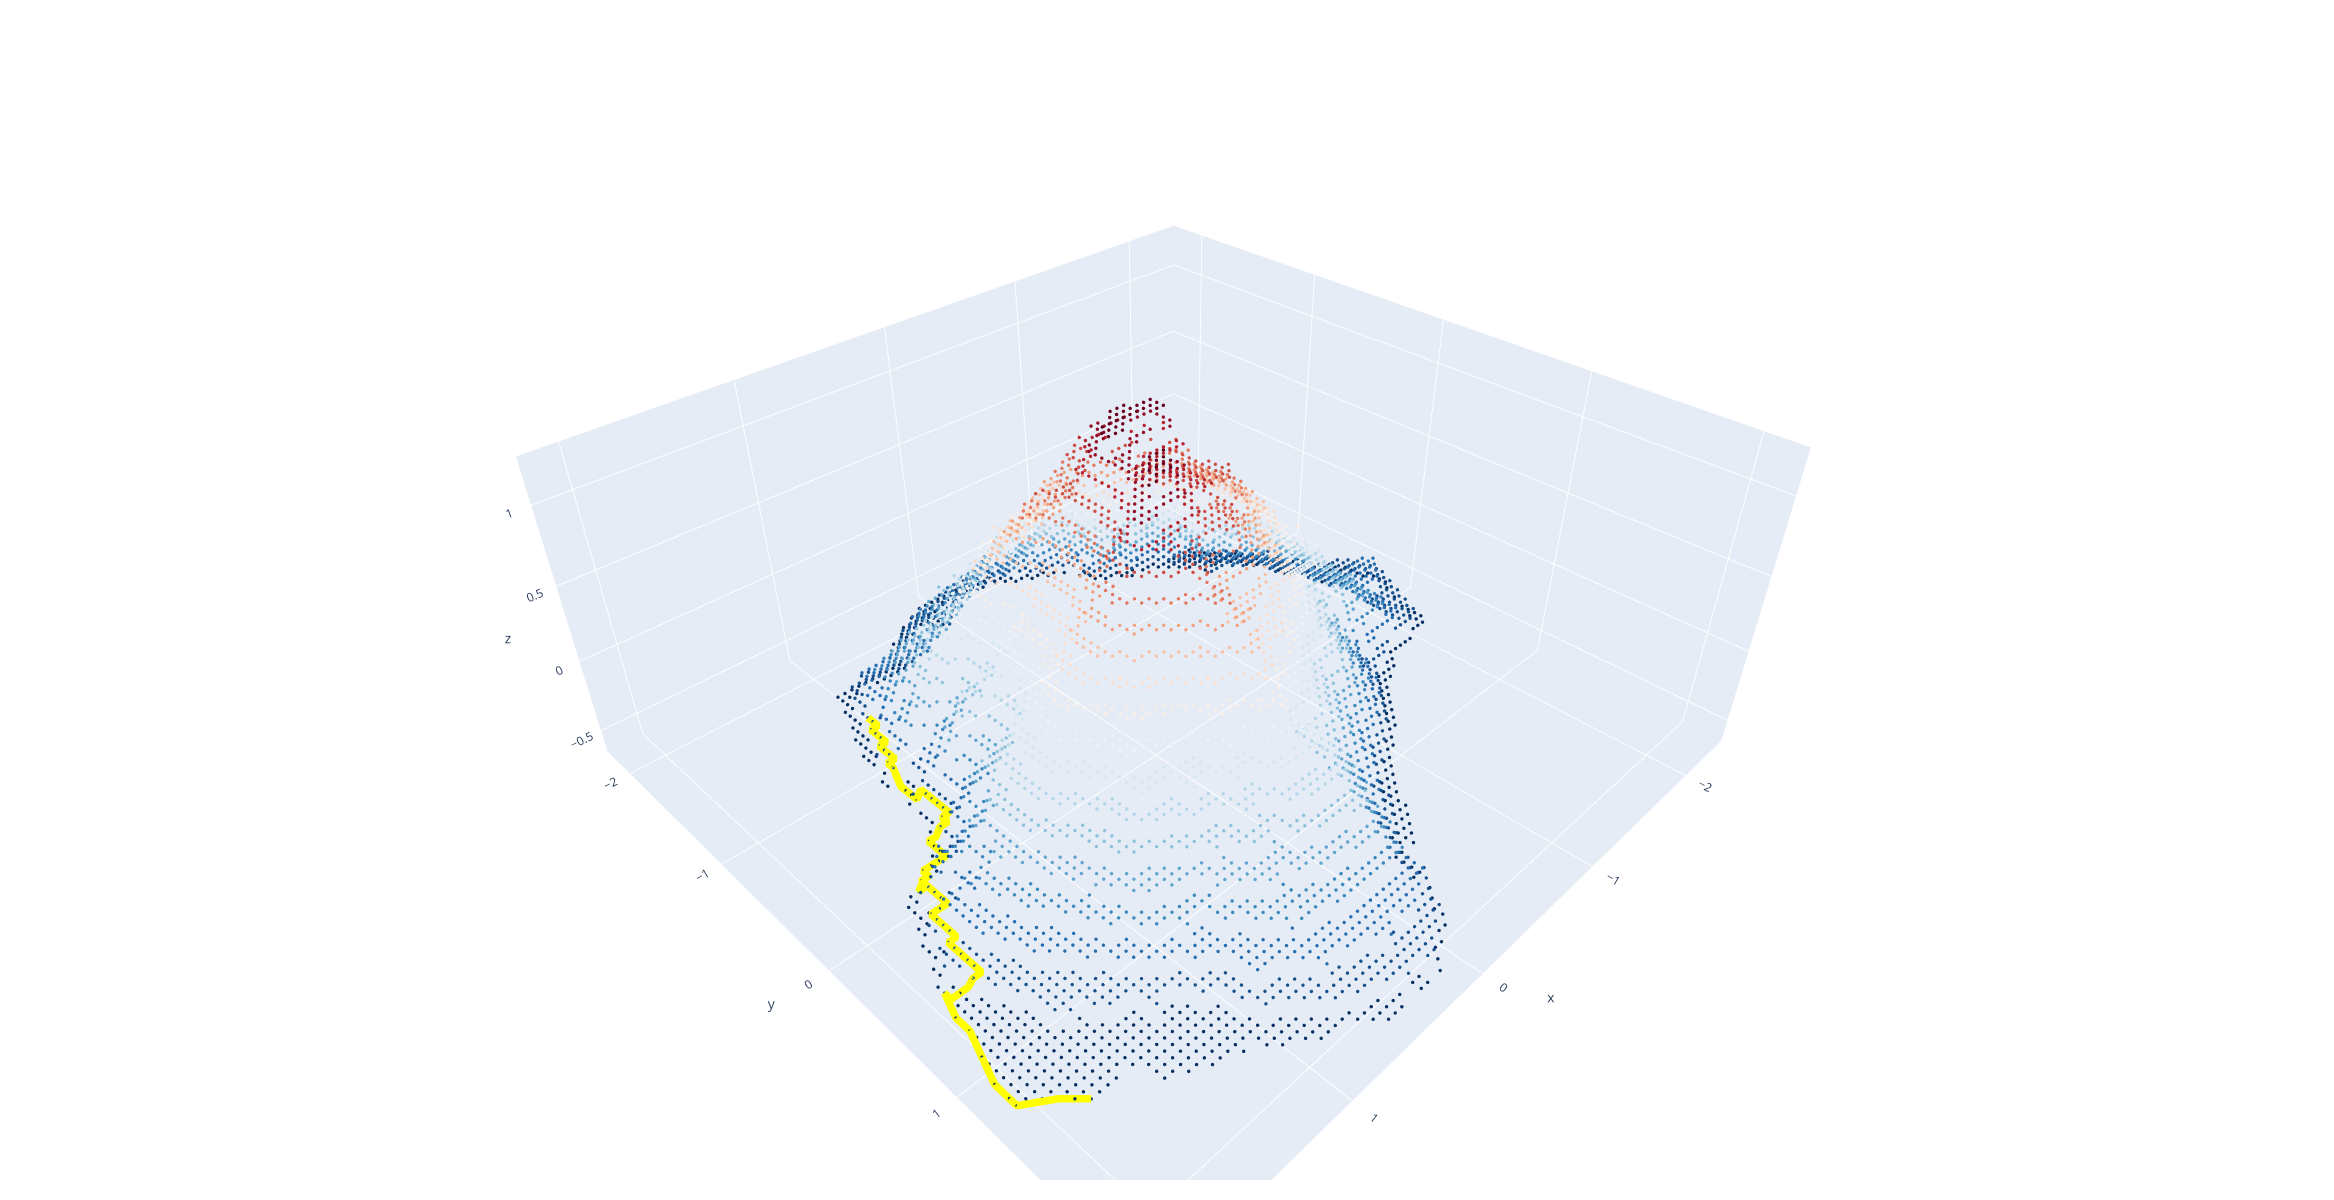

In [6]:
# Plot shortest path.
from volcapy.graph.cost_functions import walking_cost_fn_edge

# Base cell.
base_cell = data_coords_inds_insurf[0]

shortest_path_inds = nx.shortest_path(graph_merged, base_cell, 3800, weight=walking_cost_fn_edge)

def compute_path_cost(graph, path, cost_fn):
    cost = 0
    for i in range(len(path) - 1):
        cost += cost_fn(path[i], path[i + 1], graph.get_edge_data(path[i], path[i + 1]))
    return cost

print("Time for shortest path: {} mins.".format(compute_path_cost(graph_merged, shortest_path_inds, walking_cost_fn_edge) / 60.0 ))
        

# First plot all nodes.
trace1 = go.Scatter3d(
    x=x[graph_merged.nodes], y=y[graph_merged.nodes], z=z[graph_merged.nodes],
    mode='markers',
    marker=dict(
        size=2,
        color=z[graph_merged.nodes],
        colorscale='RdBu_r',
    ))

# Plot path.
x_lines, y_lines, z_lines = [], [], []
for edge in list(graph_trails_insurf.edges):
    for i in range(2):
        x_lines.append(xyz_norm[edge[i], 0])
        y_lines.append(xyz_norm[edge[i], 1])
        z_lines.append(xyz_norm[edge[i], 2])
    x_lines.append(None)
    y_lines.append(None)
    z_lines.append(None)
    
trace2 = go.Scatter3d(
    x=x[shortest_path_inds],
    y=y[shortest_path_inds],
    z=z[shortest_path_inds],
    mode='lines',
    name='lines',
    line=dict(
        color='yellow',
        width=15
    )
)

fig = go.Figure(data=[trace1, trace2])
fig.update_layout(
    showlegend=False,
    autosize=False,
    width=1800,
    height=1200,
    margin=dict(
        l=50,
        r=50,
        b=20,
        t=40,
        pad=2
    ),
)
# fig.write_image("./images/ground_truth_3D_sample{}.pdf".format(sample_nr))
fig.show()

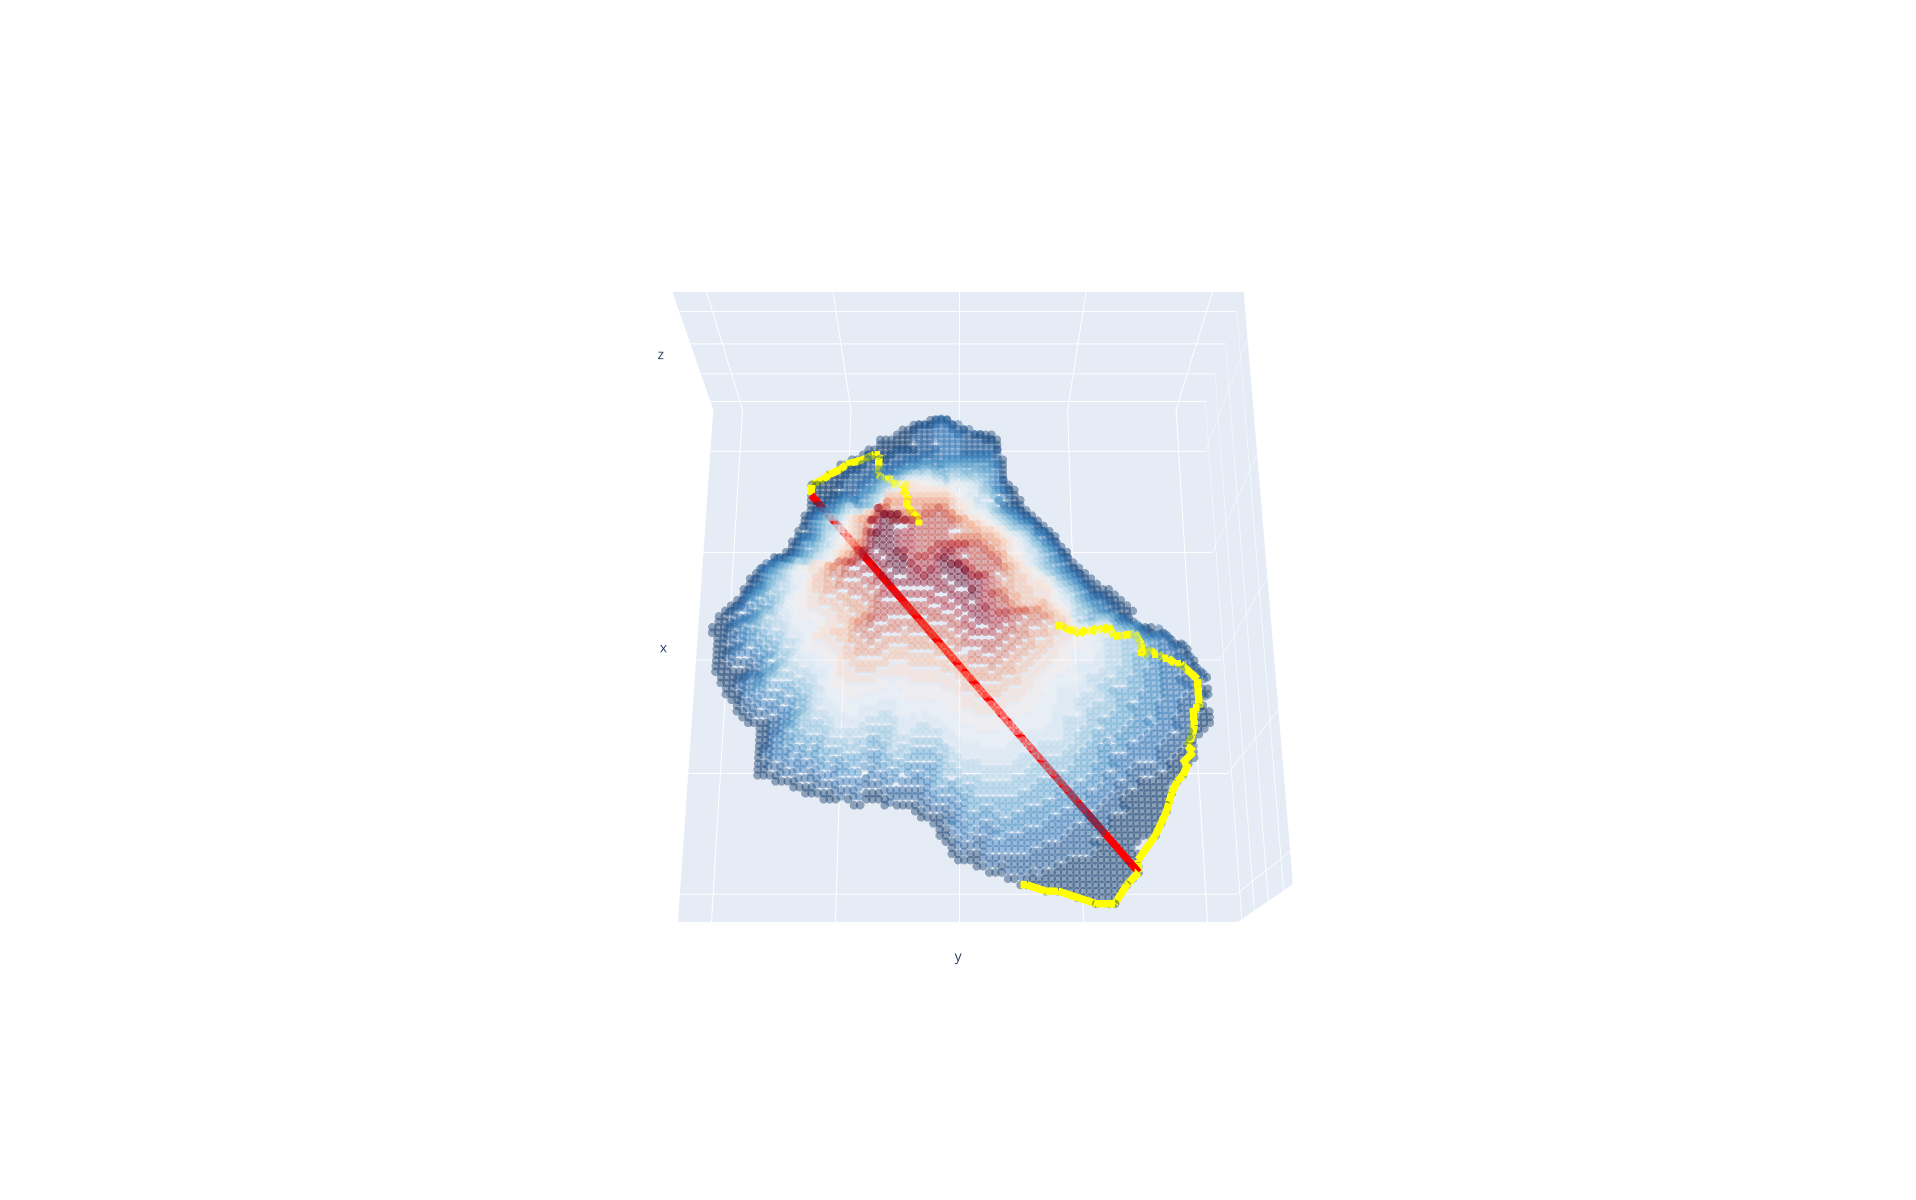

In [40]:
# Plot bare surface topography and the trails.
# First plot all nodes.
trace1 = go.Scatter3d(
    x=x[graph_merged.nodes], y=y[graph_merged.nodes], z=z[graph_merged.nodes],
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.4,
        color=z[graph_merged.nodes],
        colorscale='RdBu_r',
    ))

# Built color array for the edges.
edge_colors = []
for node1, node2, edge_attr in list(graph_trails_insurf.edges(data=True)):
    attr = edge_attr['path_attribute']
    if attr == 'no_trail':
        edge_colors.append('green')
        edge_colors.append('green')
        edge_colors.append('green')

    elif attr == 'trail':
        edge_colors.append('yellow')
        edge_colors.append('yellow')
        edge_colors.append('yellow')
    elif attr == 'override':
        edge_colors.append('red')
        edge_colors.append('red')
        edge_colors.append('red')
        
x_lines, y_lines, z_lines = [], [], []
for edge in list(graph_trails_insurf.edges):
    for i in range(2):
        x_lines.append(xyz_norm[edge[i], 0])
        y_lines.append(xyz_norm[edge[i], 1])
        z_lines.append(xyz_norm[edge[i], 2])
    x_lines.append(None)
    y_lines.append(None)
    z_lines.append(None)
    
trace2 = go.Scatter3d(
    x=x_lines,
    y=y_lines,
    z=z_lines,
    mode='lines',
    name='lines',
    line=dict(
        color=edge_colors,
        width=15
    )
)

fig = go.Figure(data=[trace1, trace2])
fig.update_layout(
    showlegend=False,
    autosize=False,
    width=1800,
    height=1200,
    margin=dict(
        l=50,
        r=50,
        b=20,
        t=40,
        pad=2
    ),
)

# Default parameters which are used when `layout.scene.camera` is not provided
camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=1.1, y=0.0, z=3.0)
    # eye=dict(x=1.4, y=2.5, z=0.7)
)
fig.update_layout(scene_camera=camera)

# Remove ticks.
fig.update_layout(
    scene=dict(
        xaxis=dict(showticklabels=False),
        yaxis=dict(showticklabels=False),
        zaxis=dict(showticklabels=False),
    )
)

fig.write_image("images/surface_mesh_with_trails.pdf")
fig.show()

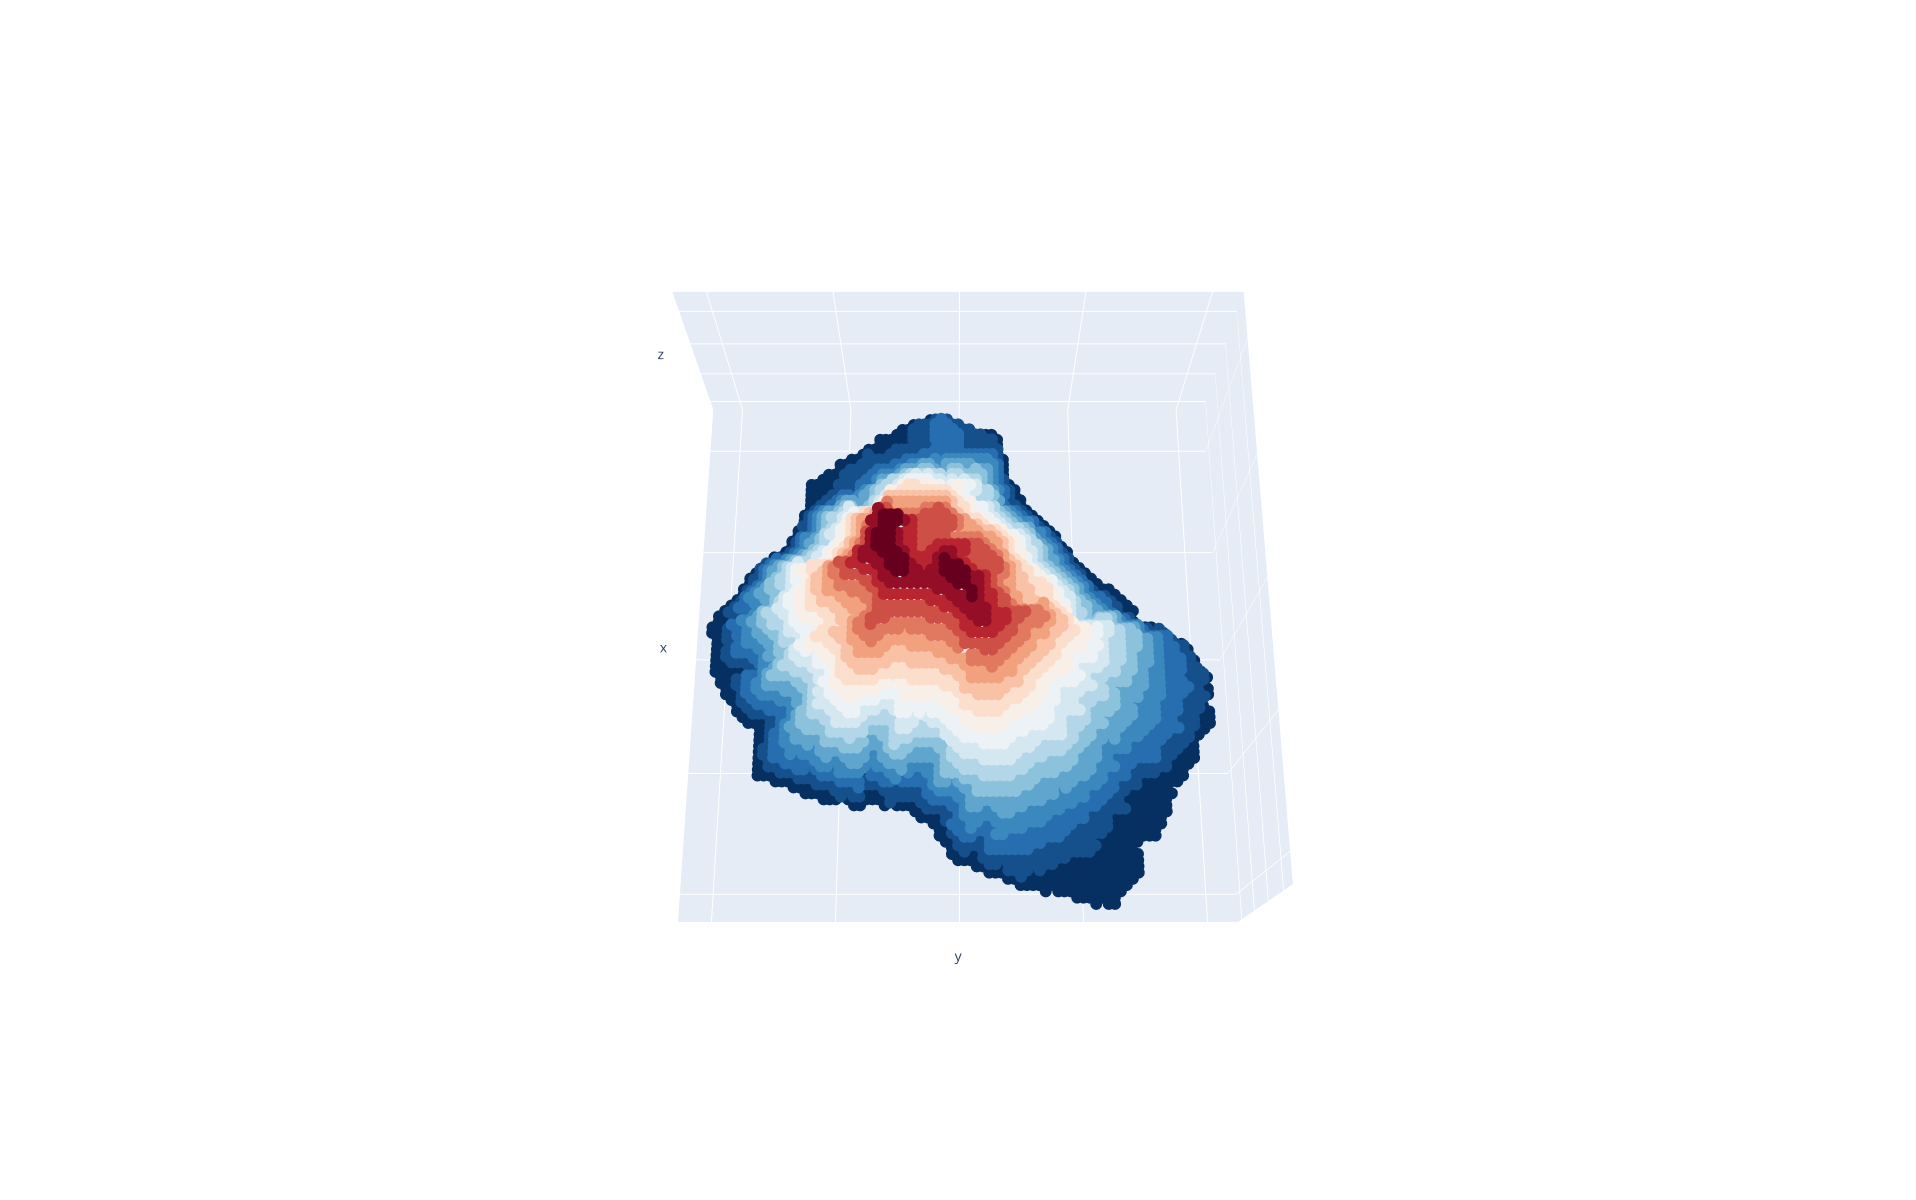

In [21]:
# Plot bare surface topography.
# First plot all nodes.
trace1 = go.Scatter3d(
    x=x[graph_merged.nodes], y=y[graph_merged.nodes], z=z[graph_merged.nodes],
    mode='markers',
    marker=dict(
        size=7,
        color=z[graph_merged.nodes],
        colorscale='RdBu_r',
    ))
traces_list = [trace1]
fig = go.Figure(data=[trace1])
fig.update_layout(
    showlegend=False,
    autosize=False,
    width=1800,
    height=1200,
    margin=dict(
        l=50,
        r=50,
        b=20,
        t=40,
        pad=2
    ),
)

# Default parameters which are used when `layout.scene.camera` is not provided
camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=1.1, y=0.0, z=3.0)
    # eye=dict(x=1.4, y=2.5, z=0.7)
)
fig.update_layout(scene_camera=camera)

# Remove ticks.
fig.update_layout(
    scene=dict(
        xaxis=dict(showticklabels=False),
        yaxis=dict(showticklabels=False),
        zaxis=dict(showticklabels=False),
    )
)

fig.write_image("images/surface_mesh.pdf")
fig.show()

# Test shortest closed path algorithm.

In [8]:
# Test graph loading.
from volcapy.graph.loading import load_Stromboli_graphs
_, _, accessibility_graph = load_Stromboli_graphs(data_folder)


from volcapy.path_planning import solve_TSP
from volcapy.graph.cost_functions import symmetric_walking_cost_fn_edge

# Draw a random set of observation location.
design_nodes = np.random.choice(np.array(accessibility_graph.nodes), size=70, replace=False)
shortest_path, cost = solve_TSP(accessibility_graph, design_nodes, symmetric_walking_cost_fn_edge)

In [21]:
# Compute the path details.
shortest_path_details = [nx.shortest_path(accessibility_graph, shortest_path[i], shortest_path[i+1], symmetric_walking_cost_fn_edge) for i in range(len(shortest_path) - 1)]

[[935, 990, 1047, 1106, 1105, 1165, 1164, 1163, 1225, 1224, 1223, 1287, 1353, 1352, 1420, 1490], [1490, 1562, 1563, 1634, 1707, 1783], [1783, 1782, 1859, 1858], [1858, 1859, 1782, 1706, 1633, 1562, 1490, 1420, 1352, 1353, 1287, 1223, 1224, 1225, 1163, 1164, 1165, 1105, 1106, 1107, 1108, 1049, 992, 937, 938, 886], [886, 885], [885, 884, 883, 935, 934, 933, 988, 987, 1044, 1043, 1042, 1101, 1100, 1099, 1159, 1158, 1220, 1284], [1284, 1350, 1349, 1417, 1416, 1486, 1558, 1559, 1630, 1703, 1702, 1778, 1777, 1854, 1932, 1933, 2013, 2094, 2095, 2176, 2177, 2259, 2341, 2423, 2506, 2587, 2669, 2750, 2829, 2830, 2831, 2832, 2911, 2912, 2913, 2992, 3070, 3146, 3221, 3220, 3294], [3294, 3367, 3366, 3439], [3439, 3366, 3293, 3219, 3144, 3068, 2990, 2989, 2910, 2909, 2908, 2907, 2828, 2827, 2748, 2667, 2585, 2504, 2421, 2339, 2338, 2256, 2255, 2254, 2253, 2171, 2090, 2009], [2009, 2008, 2007, 2006, 1926, 1848, 1771, 1695, 1622], [1622, 1551, 1552, 1480, 1481, 1411, 1412, 1344, 1345, 1279, 1215, 1216

In [ ]:
# Plot shortest path.

# All nodes.
trace1 = go.Scatter3d(
    x=x[graph_merged.nodes], y=y[graph_merged.nodes], z=z[graph_merged.nodes],
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.4,
        color=z[graph_merged.nodes],
        colorscale='RdBu_r',
    ))

# The design node.
trace2 = go.Scatter3d(
    x=x[design_nodes], y=y[design_nodes], z=z[design_nodes],
    mode='markers',
    marker=dict(
        size=14,
        opacity=1.0,
        color='green'
    ))

# The path connecting the design nodes.
x_lines, y_lines, z_lines = [], [], []
for path_leg in shortest_path_details:
    # Append path coordinates.
    for intermediate_node in path_leg:
        x_lines.append(xyz_norm[intermediate_node, 0])
        y_lines.append(xyz_norm[intermediate_node, 1])
        z_lines.append(xyz_norm[intermediate_node, 2])
trace3 = go.Scatter3d(
    x=x_lines,
    y=y_lines,
    z=z_lines,
    mode='lines',
    name='lines',
    line=dict(
        color='springgreen',
        width=15
    )
)

fig = go.Figure(data=[trace1, trace2, trace3])
fig.update_layout(
    showlegend=False,
    autosize=False,
    width=1800,
    height=1200,
    margin=dict(
        l=50,
        r=50,
        b=20,
        t=40,
        pad=2
    ),
)

# Default parameters which are used when `layout.scene.camera` is not provided
camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=1.1, y=0.0, z=3.0)
    # eye=dict(x=1.4, y=2.5, z=0.7)
)
fig.update_layout(scene_camera=camera)

# Remove ticks.
fig.update_layout(
    scene=dict(
        xaxis=dict(showticklabels=False),
        yaxis=dict(showticklabels=False),
        zaxis=dict(showticklabels=False),
    )
)

fig.write_image("images/surface_mesh_with_trails.pdf")
fig.show()

In [12]:
accessibility_graph.nodes[1]

{'node_ind_in_surface_mesh': 1}